## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'
labels = '../Tabular_data/Label_CSV_All_Municipality.csv'

Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 80
T=3
autoregressive = True

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 3]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=None, fusion='late'):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)


In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (124, 2049)
The test shape is: (32, 2049)
The shape of the features is (121, 6147)
The shape of the labels is (121, 1)
The shape of the features is (29, 6147)
The shape of the labels is (29, 1)
The initial shapes are:
The train shape is (121, 6147)
The test shape is (29, 6147)
-----------------------
The Final sha

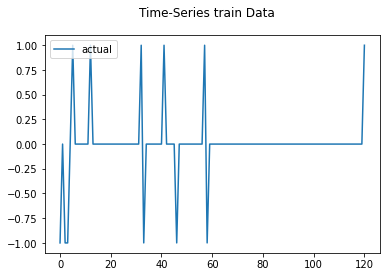

2023-02-23 16:24:53.332041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 16:24:53.332089: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 16:24:53.332114: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-23 16:24:53.332344: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 16:24:56.882569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_input (InputLayer)         [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_2_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 3)            15361213    lstm_input[0][0]                 
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 3)            7169213     lstm_2_input[0][0]               
__________

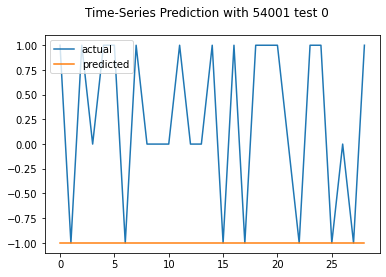

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_4_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_6_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 3)            15361213    lstm_4_input[0][0]               
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 3)            7169213     lstm_6_input[0][0]               
________

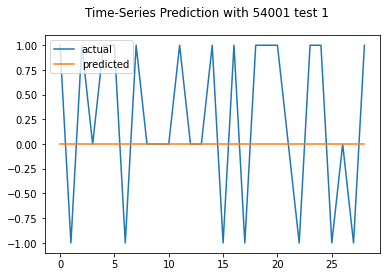

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_8_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_10_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 3)            15361213    lstm_8_input[0][0]               
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 3)            7169213     lstm_10_input[0][0]              
________

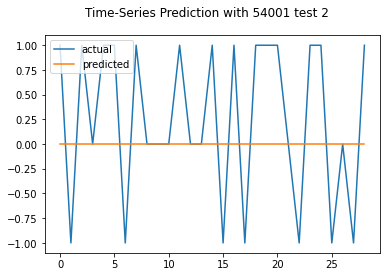

auc : average=0.474, std=0.057
acc : average=0.264, std=0.016
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
##############################################################################################

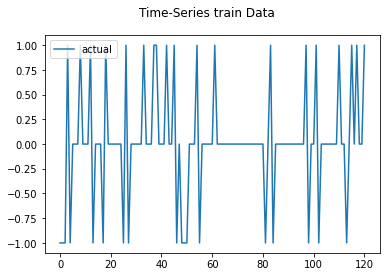

Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_12_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_14_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 3)            15361213    lstm_12_input[0][0]              
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 3)            7169213     lstm_14_input[0][0]              
________

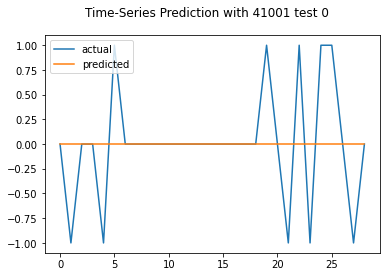

Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_16_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_18_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 3)            15361213    lstm_16_input[0][0]              
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 3)            7169213     lstm_18_input[0][0]              
________

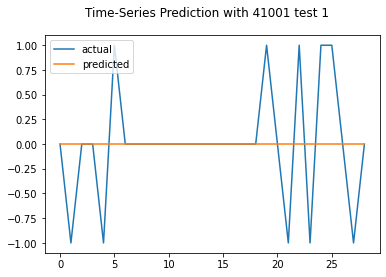

Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_20_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_22_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 3)            15361213    lstm_20_input[0][0]              
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 3)            7169213     lstm_22_input[0][0]              
________

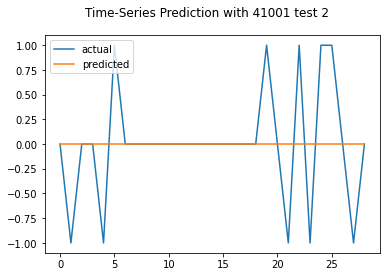

auc : average=0.768, std=0.014
acc : average=0.655, std=0.000
f1_score : average=0.263, std=0.372
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
##############################################################################################

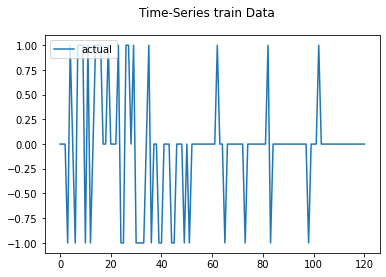

Restoring model weights from the end of the best epoch.
Epoch 00078: early stopping
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_24_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_26_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      (None, 3)            15361213    lstm_24_input[0][0]              
__________________________________________________________________________________________________
sequential_13 (Sequential)      (None, 3)            7169213     lstm_26_input[0][0]              
________

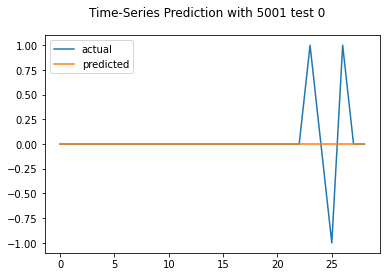

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_28_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_30_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 3)            15361213    lstm_28_input[0][0]              
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 3)            7169213     lstm_30_input[0][0]              
________

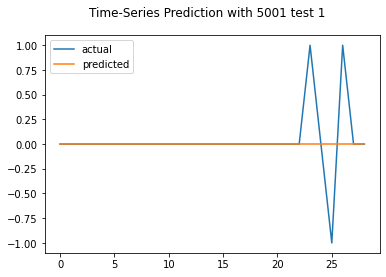

Restoring model weights from the end of the best epoch.
Epoch 00040: early stopping
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_32_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_34_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 3)            15361213    lstm_32_input[0][0]              
__________________________________________________________________________________________________
sequential_17 (Sequential)      (None, 3)            7169213     lstm_34_input[0][0]              
________

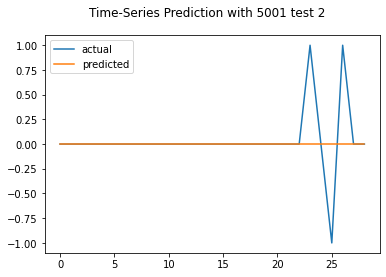

auc : average=0.941, std=0.009
acc : average=0.897, std=0.000
f1_score : average=0.315, std=0.446
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
##############################################################################################

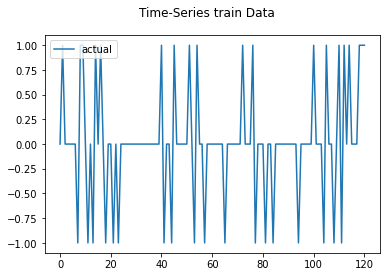

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_36_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_38_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_18 (Sequential)      (None, 3)            15361213    lstm_36_input[0][0]              
__________________________________________________________________________________________________
sequential_19 (Sequential)      (None, 3)            7169213     lstm_38_input[0][0]              
________

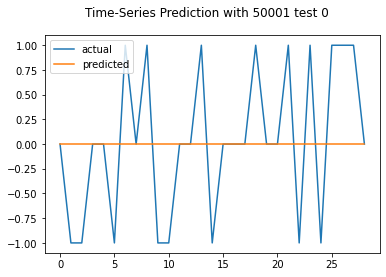

Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_40_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_42_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 3)            15361213    lstm_40_input[0][0]              
__________________________________________________________________________________________________
sequential_21 (Sequential)      (None, 3)            7169213     lstm_42_input[0][0]              
_______

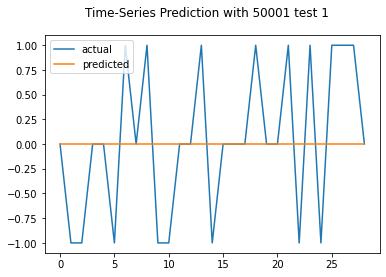

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_44_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_46_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_22 (Sequential)      (None, 3)            15361213    lstm_44_input[0][0]              
__________________________________________________________________________________________________
sequential_23 (Sequential)      (None, 3)            7169213     lstm_46_input[0][0]              
_______

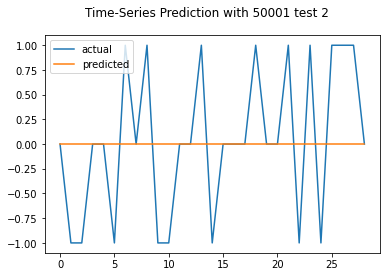

auc : average=0.556, std=0.012
acc : average=0.414, std=0.000
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
##############################################################################################

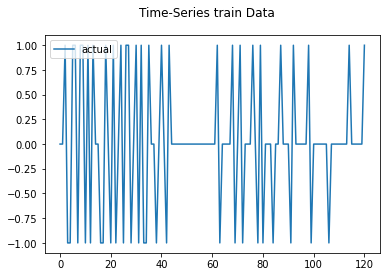

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_48_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_50_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_24 (Sequential)      (None, 3)            15361213    lstm_48_input[0][0]              
__________________________________________________________________________________________________
sequential_25 (Sequential)      (None, 3)            7169213     lstm_50_input[0][0]              
_______

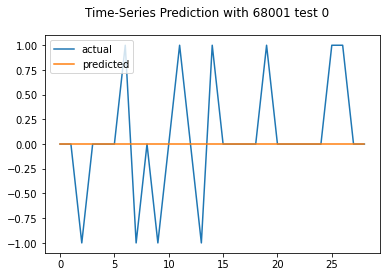

Restoring model weights from the end of the best epoch.
Epoch 00089: early stopping
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_52_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_54_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_26 (Sequential)      (None, 3)            15361213    lstm_52_input[0][0]              
__________________________________________________________________________________________________
sequential_27 (Sequential)      (None, 3)            7169213     lstm_54_input[0][0]              
_______

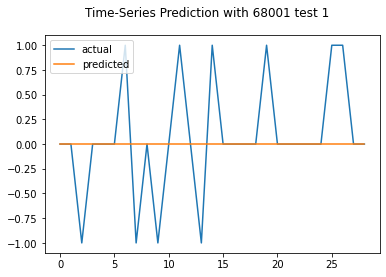

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_56_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_58_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 3)            15361213    lstm_56_input[0][0]              
__________________________________________________________________________________________________
sequential_29 (Sequential)      (None, 3)            7169213     lstm_58_input[0][0]              
___________________________________________________________________________________________

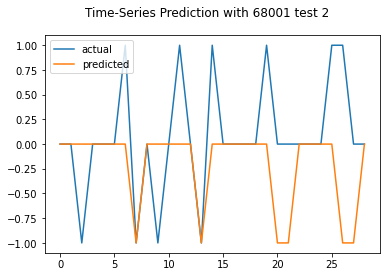

auc : average=0.771, std=0.012
acc : average=0.644, std=0.016
f1_score : average=0.295, std=0.346
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
##############################################################################################

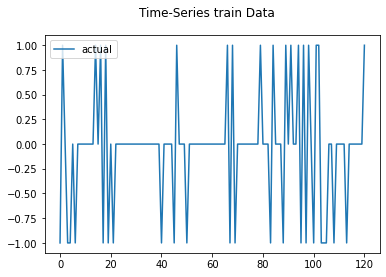

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_60_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_62_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_30 (Sequential)      (None, 3)            15361213    lstm_60_input[0][0]              
__________________________________________________________________________________________________
sequential_31 (Sequential)      (None, 3)            7169213     lstm_62_input[0][0]              
_______

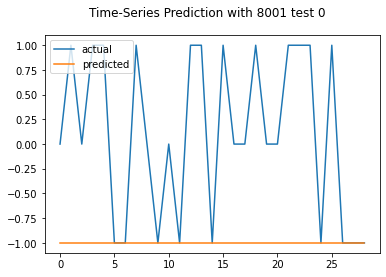

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_64_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_66_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_32 (Sequential)      (None, 3)            15361213    lstm_64_input[0][0]              
__________________________________________________________________________________________________
sequential_33 (Sequential)      (None, 3)            7169213     lstm_66_input[0][0]              
_______

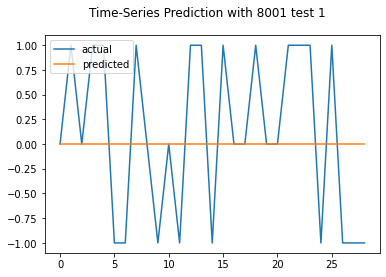

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_68_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_70_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_34 (Sequential)      (None, 3)            15361213    lstm_68_input[0][0]              
__________________________________________________________________________________________________
sequential_35 (Sequential)      (None, 3)            7169213     lstm_70_input[0][0]              
_______

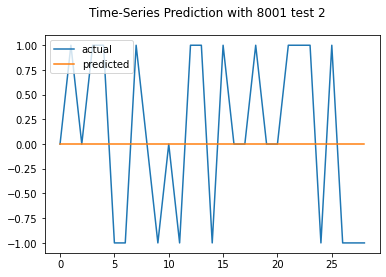

auc : average=0.470, std=0.036
acc : average=0.287, std=0.016
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
##############################################################################################

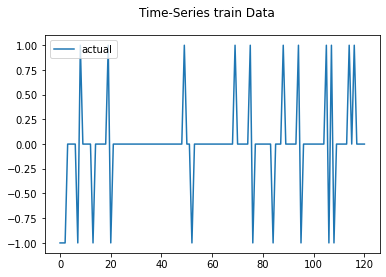

Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_72_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_74_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_36 (Sequential)      (None, 3)            15361213    lstm_72_input[0][0]              
__________________________________________________________________________________________________
sequential_37 (Sequential)      (None, 3)            7169213     lstm_74_input[0][0]              
_______

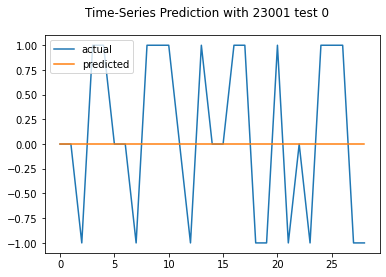

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_76_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_78_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_38 (Sequential)      (None, 3)            15361213    lstm_76_input[0][0]              
__________________________________________________________________________________________________
sequential_39 (Sequential)      (None, 3)            7169213     lstm_78_input[0][0]              
_______

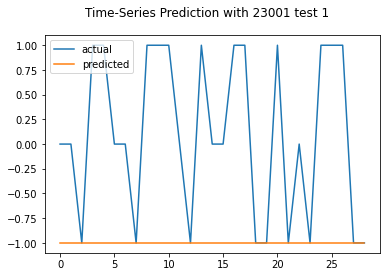

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_80_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_82_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_40 (Sequential)      (None, 3)            15361213    lstm_80_input[0][0]              
__________________________________________________________________________________________________
sequential_41 (Sequential)      (None, 3)            7169213     lstm_82_input[0][0]              
_______

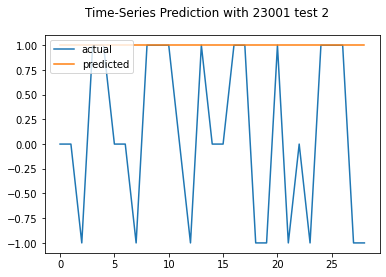

auc : average=0.511, std=0.033
acc : average=0.333, std=0.059
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
##############################################################################################

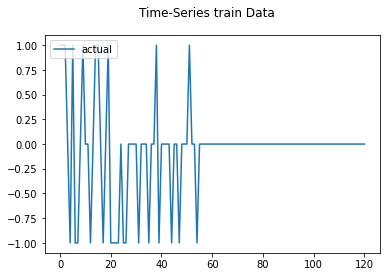

Restoring model weights from the end of the best epoch.
Epoch 00057: early stopping
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_84_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_86_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_42 (Sequential)      (None, 3)            15361213    lstm_84_input[0][0]              
__________________________________________________________________________________________________
sequential_43 (Sequential)      (None, 3)            7169213     lstm_86_input[0][0]              
_______

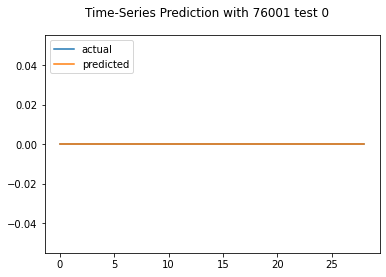

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_88_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_90_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_44 (Sequential)      (None, 3)            15361213    lstm_88_input[0][0]              
__________________________________________________________________________________________________
sequential_45 (Sequential)      (None, 3)            7169213     lstm_90_input[0][0]              
___________________________________________________________________________________________

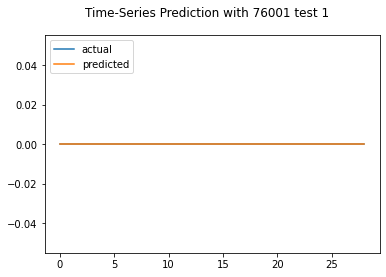

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_92_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_94_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_46 (Sequential)      (None, 3)            15361213    lstm_92_input[0][0]              
__________________________________________________________________________________________________
sequential_47 (Sequential)      (None, 3)            7169213     lstm_94_input[0][0]              
___________________________________________________________________________________________

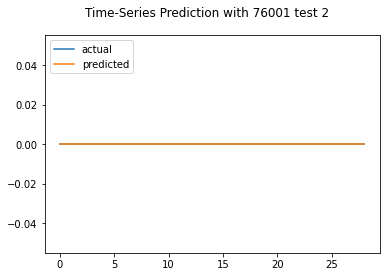

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.333, std=0.471
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
##############################################################################################

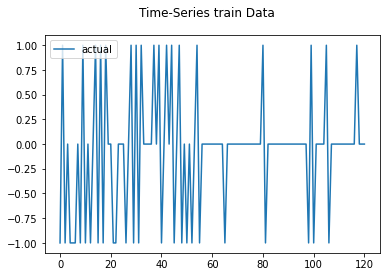

Restoring model weights from the end of the best epoch.
Epoch 00084: early stopping
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_104_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_106_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_52 (Sequential)      (None, 3)            15361213    lstm_104_input[0][0]             
__________________________________________________________________________________________________
sequential_53 (Sequential)      (None, 3)            7169213     lstm_106_input[0][0]             
_______

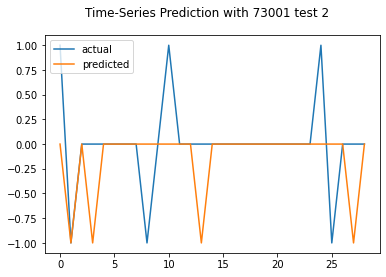

auc : average=0.926, std=0.016
acc : average=0.805, std=0.059
f1_score : average=0.297, std=0.420
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
##############################################################################################

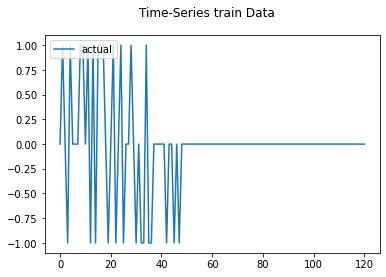

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_108_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_110_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_54 (Sequential)      (None, 3)            15361213    lstm_108_input[0][0]             
__________________________________________________________________________________________________
sequential_55 (Sequential)      (None, 3)            7169213     lstm_110_input[0][0]             
___________________________________________________________________________________________

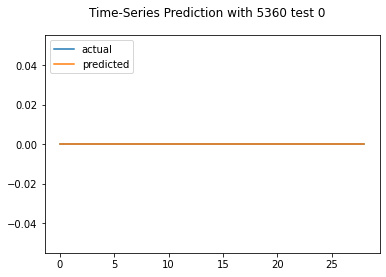

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_112_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_114_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_56 (Sequential)      (None, 3)            15361213    lstm_112_input[0][0]             
__________________________________________________________________________________________________
sequential_57 (Sequential)      (None, 3)            7169213     lstm_114_input[0][0]             
___________________________________________________________________________________________

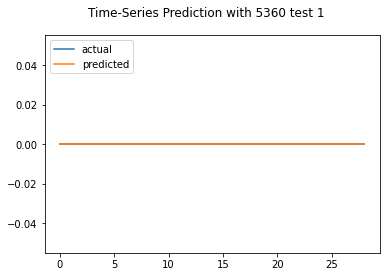

Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_116_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_118_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_58 (Sequential)      (None, 3)            15361213    lstm_116_input[0][0]             
__________________________________________________________________________________________________
sequential_59 (Sequential)      (None, 3)            7169213     lstm_118_input[0][0]             
_______

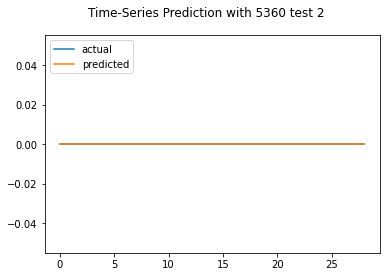

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.333, std=0.471
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=True, fusion='joint')

In [7]:
results

{54001: {'rmse': [0.4738406737645467, 0.05654191951410413],
  'mape': [0.26436781386534375, 0.016255329998701894],
  'smape': [0.0, 0.0]},
 41001: {'rmse': [0.7681331634521484, 0.014473702734001616],
  'mape': [0.6551724076271057, 0.0],
  'smape': [0.26271045, 0.3715871]},
 5001: {'rmse': [0.941042423248291, 0.00866442549821636],
  'mape': [0.8965517282485962, 0.0],
  'smape': [0.3151515, 0.44569156]},
 50001: {'rmse': [0.5559849341710409, 0.012223697288518041],
  'mape': [0.4137931168079376, 0.0],
  'smape': [0.0, 0.0]},
 68001: {'rmse': [0.771006723244985, 0.011806909463869192],
  'mape': [0.6436781485875448, 0.016255337023176646],
  'smape': [0.29514158, 0.34593663]},
 8001: {'rmse': [0.47047166029612225, 0.03563740680981169],
  'mape': [0.28735631704330444, 0.016255322974227143],
  'smape': [0.0, 0.0]},
 23001: {'rmse': [0.5111969908078512, 0.03252423131401963],
  'mape': [0.3333333333333333, 0.058609427758146815],
  'smape': [0.0, 0.0]},
 76001: {'rmse': [0.999999980131785, 2.8097